<a href="https://colab.research.google.com/github/Abhilashg11/Data_science/blob/master/ANN_Neuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
import keras
import tensorflow
from keras.layers import Dense,Dropout
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from scikeras.wrappers import kerasClassifier

ModuleNotFoundError: ignored

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [8]:
x_train/=255
x_test/=255

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [10]:
epochs =4
batch_size = 140
##check
no_classes = 10

In [11]:
## building the model

In [12]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(no_classes,activation='softmax'))
model.summary()
##check dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               153900    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 558830 (2.13 MB)
Trainable params: 558830 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
##compile the model

In [14]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics='accuracy')

In [15]:
##fit the model

In [16]:
history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(x_test,y_test))

Epoch 1/4
429/429 [==============================] - 11s 23ms/step - loss: 0.2718 - accuracy: 0.9159 - val_loss: 0.1109 - val_accuracy: 0.9653
Epoch 2/4
429/429 [==============================] - 7s 17ms/step - loss: 0.1102 - accuracy: 0.9660 - val_loss: 0.0915 - val_accuracy: 0.9722
Epoch 3/4
429/429 [==============================] - 10s 24ms/step - loss: 0.0773 - accuracy: 0.9757 - val_loss: 0.0723 - val_accuracy: 0.9778
Epoch 4/4
429/429 [==============================] - 16s 36ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0678 - val_accuracy: 0.9796


In [17]:
##check loss,acc,...

In [18]:
score=model.evaluate(x_test,y_test)
print('the loss=',score[0])
print('the accuracy=',score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.0678 - accuracy: 0.9796
the loss= 0.06781404465436935
the accuracy= 0.9796000123023987


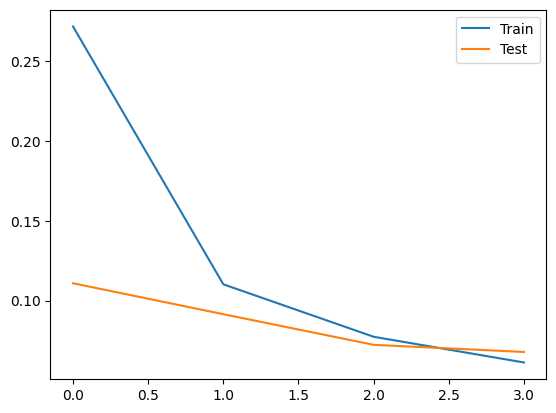

In [28]:
plt.plot(range(4),history.history['loss'],label='Train')
plt.plot(range(4),history.history['val_loss'],label='Test')
plt.legend()

In [30]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [31]:
pred

array([[4.8702313e-09, 2.2867864e-07, 6.7101182e-06, ..., 9.9997026e-01,
        9.2146379e-08, 7.0310671e-07],
       [9.6095770e-11, 5.6511926e-06, 9.9999422e-01, ..., 6.2686467e-10,
        6.0267307e-09, 4.0266803e-15],
       [1.6522655e-08, 9.9994653e-01, 8.9796795e-06, ..., 3.3757897e-05,
        2.8844840e-06, 1.0561462e-07],
       ...,
       [2.3055618e-11, 1.3140975e-08, 2.2711262e-10, ..., 6.3400637e-07,
        8.0325542e-08, 2.2019283e-07],
       [1.9687288e-08, 1.7524703e-08, 9.2938834e-10, ..., 4.6711843e-09,
        4.4259118e-04, 1.3448450e-08],
       [1.5453148e-07, 6.0464876e-11, 1.7760986e-09, ..., 1.9295119e-12,
        1.4142559e-09, 1.0468938e-10]], dtype=float32)

In [32]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
 pred[0]

array([4.8702313e-09, 2.2867864e-07, 6.7101182e-06, 2.1924361e-05,
       2.0469053e-10, 4.6929376e-09, 3.8612264e-12, 9.9997026e-01,
       9.2146379e-08, 7.0310671e-07], dtype=float32)

In [34]:
np.argmax (pred[50])

6

In [35]:
y_test[50]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [36]:
a = []
for i in range(len(pred)):
  a.append(np.argmax(pred[i]))

In [37]:
a

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [59]:
df = pd.DataFrame(a,columns=['Predicted_value'])

In [60]:
df

,Predicted_value
0,7
1,2
2,1
3,0
4,4
...,...
59995,2
59996,3
59997,4
59998,5


In [61]:
b = []
for J in range(len(y_test)):
  b.append(np.argmax(y_test[J]))

In [62]:
df['Actual']=b


ValueError: ignored